# Lottery Strategy Test
Some folks have lucky numbers and use them when playing the lottery. Is using the same lottery numbers every time a better strategy than randomly chosing every time? My intuition says no, but let's verify with a simulation!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First let's define the lottery setup:

In [2]:
number_pool = 20  # Max of integers (from 0) that can be chosen
number_of_choices = 5   # Number of choices

In [3]:
my_numbers_same = np.array([7,10,7,12,1])
my_numbers_same

array([ 7, 10,  7, 12,  1])

In [4]:
my_numbers_rand = np.random.choice(number_pool, number_of_choices)
my_numbers_rand

array([14, 15, 10, 15,  7])

In [5]:
lottery_numbers = np.random.choice(number_pool, number_of_choices)
lottery_numbers

array([0, 7, 4, 6, 2])

Does order matter? If not:

In [6]:
order_matters = "no"
if order_matters == 'no':
    my_numbers_same.sort()
    my_numbers_rand.sort()
    lottery_numbers.sort()

In [7]:
results = my_numbers_same == lottery_numbers
results

array([False, False, False, False, False])

In [8]:
results.min()

False

Let's put this all together in a function:

In [9]:
def lottery_test(number_pool=10, number_of_choices=3, order_matters = 'no'):
    count_same = 0
    count_rand = 0
    my_numbers_same = np.random.choice(number_pool, number_of_choices) # randomly chosing this once
    
    results_stop = [0,0]    
    while sum(results_stop) < 2:
        my_numbers_rand = np.random.choice(number_pool, number_of_choices)
        lottery_numbers = np.random.choice(number_pool, number_of_choices)
        
        if order_matters == 'no':
            my_numbers_same.sort()
            my_numbers_rand.sort()
            lottery_numbers.sort()
            
        results_same = my_numbers_same == lottery_numbers    
        results_rand = my_numbers_rand == lottery_numbers
        
        if results_stop[0] == 0 and results_same.min() == False:
            count_same += 1
        else:
            results_stop[0] = 1
            
        if results_stop[1] == 0 and results_rand.min() == False:
            count_rand += 1
        else:
            results_stop[1] = 1  
     
    count_same_rand = [count_same, count_rand]
    return count_same_rand

In [10]:
lottery_test(number_pool=10, number_of_choices=3, order_matters='no')

[266, 6]

In [11]:
tries_to_win_same = []
tries_to_win_rand = []
same_win = []
for i in range(1000):
    trial_results = lottery_test()
    tries_to_win_same.append(trial_results[0])
    tries_to_win_rand.append(trial_results[1])
    if trial_results[0] < trial_results[1]:
        same_win.append(1)
    else:
        same_win.append(0)

In [12]:
same_win_frac = sum(same_win)/len(same_win)
same_win_frac

0.489

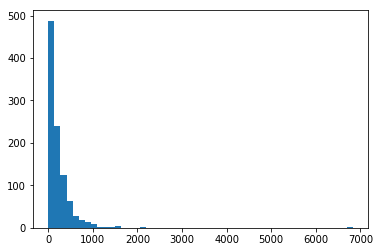

In [13]:
plt.hist(tries_to_win_same, bins=50);

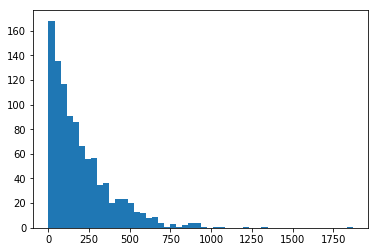

In [14]:
plt.hist(tries_to_win_rand, bins=50);

Doesn't look like using the same numbers does any better than randomly chosing everytime. What is interesting to me is to see different distributions for the number of tries to win for each stratey. I'll have to think about that some more...